In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl

plays = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/plays.csv")
player_play = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/player_play.csv")
players = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/players.csv")
tracking_week_1 = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/tracking_week_1.csv")
tracking_week_2 = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/tracking_week_2.csv")
tracking_week_3 = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/tracking_week_3.csv")
tracking_week_4 = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/tracking_week_4.csv")
tracking_week_5 = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/tracking_week_5.csv")
tracking_week_6 = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/tracking_week_6.csv")
tracking_week_7 = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/tracking_week_7.csv")
tracking_week_8 = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/tracking_week_8.csv")
tracking_week_9 = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/tracking_week_9.csv")
games = pd.read_csv("/content/drive/MyDrive/BigDataBowl25/games.csv")
pbpwks1_9.csv= pd.read_csv("/content/drive/MyDrive/BigDataBowl25/pbp22wks1_9.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Tracking Data Manipulation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import nfl_data_py as nfl

season = [2022]
pbp2022 = nfl.import_pbp_data(season)
columns = ['ngs_air_yards','number_of_pass_rushers','defenders_in_box',
           'offense_personnel','defense_personnel','pass_oe','vegas_wp',
           'epa','ep','fg_prob','td_prob','safety_prob','opp_td_prob',
           'opp_fg_prob','opp_safety_prob','no_score_prob','run_location',
          'run_gap','half_seconds_remaining','home_team','away_team','posteam',
          'week','play_id','game_id','old_game_id','defteam','game_date',
          'nfl_api_id','series','fixed_drive','drive_time_of_possession']
pbp22filtered = pbp2022[columns]
pbp22wks1_9 = pbp22filtered[(pbp22filtered['week'] >= 1) & (pbp22filtered['week'] <= 9)]
pbp22wks1_9.to_csv(r"C:\Users\NAWri\Documents\BGA\Competitions\BigDataBowl25\pbp22wks1_9.csv", index=False)
pbp22wks1_9 = pbp22wks1_9.rename(columns={
    'old_game_id_x': 'gameId',
    'play_id': 'playId',
})
def add_running_yards(pbp_data):
    pbp_data = pbp_data.sort_values(by=['gameId', 'fixed_drive', 'playId'])
    pbp_data['cumulativedriveyards'] = pbp_data.groupby(['gameId', 'fixed_drive'])['yards_gained'].cumsum()

    return pbp_data
pbp22wks1_9 = add_running_yards(pbp22wks1_9)
#----------------------------------------------------------------------------------------------------------

plays = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/plays.csv")
player_play = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/player_play.csv")
players = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/players.csv")
tracking_week_1 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/tracking_week_1.csv")
tracking_week_2 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/tracking_week_2.csv")
tracking_week_3 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/tracking_week_3.csv")
tracking_week_4 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/tracking_week_4.csv")
tracking_week_5 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/tracking_week_5.csv")
tracking_week_6 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/tracking_week_6.csv")
tracking_week_7 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/tracking_week_7.csv")
tracking_week_8 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/tracking_week_8.csv")
tracking_week_9 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/tracking_week_9.csv")
games = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/games.csv")

# Merge tracking files into one DataFrame
trackingdata = pd.concat([
    tracking_week_1, tracking_week_2, tracking_week_3, tracking_week_4,
    tracking_week_5, tracking_week_6, tracking_week_7, tracking_week_8, tracking_week_9
], ignore_index=True)

assignmentcolumns = ['gameId','playId','nflId','teamAbbr',
                     'pff_primaryDefensiveCoverageMatchupNflId','pff_secondaryDefensiveCoverageMatchupNflId',
                     'pff_defensiveCoverageAssignment','wasInitialPassRusher','causedPressure']
playerassignments = player_play[assignmentcolumns]
motioncolumns = ['gameId','playId','nflId','teamAbbr','inMotionAtBallSnap','shiftSinceLineset',
                 'motionSinceLineset','wasRunningRoute','routeRan',
                 'wasTargettedReceiver','hadPassReception','hadRushAttempt']
offensivemotion = player_play[motioncolumns]

# Save Dummy DFs to CSV
offensivemotion.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/offensivemotion.csv")
playerassignments.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/playerassignments.csv")

#-------------------------------------------------------------------------------------------------------------
#------------------------------------ Player Matchups Merge --------------------------------------------------
#-------------------------------------------------------------------------------------------------------------
trackplusassign = pd.merge(
    trackingdata,
    playerassignments,
    on=['gameId', 'playId', 'nflId'],
    how='left'
)

print(trackplusassign.head())
#----
# partial dataframe to make sure merge worked properly
partialtracking = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/PartialTrackingWeek1.csv")
partialtrackplusassign = pd.merge(
    partialtracking,
    playerassignments,
    on=['gameId','playId','nflId'],
    how='left'
    )
#-----
partialtrackplusassign.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/partialtrackplusassign.csv")
trackplusassign.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/trackplusassign.csv")
trackingdata.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/trackingdata.csv")
import pandas as pd
trackplusassign = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/trackplusassign.csv")
partialtrackplusassign = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/partialtrackplusassign.csv")

#---------------------------------------------------------------------------------------------------------------
#------------------------------ Distance from Matchup ----------------------------------------------------------
#---------------------------------------------------------------------------------------------------------------
# Find player distance from matchup during full process of the play
import numpy as np
# Drop erroneous columns from .to_csv files
columns_to_drop = ['Unnamed: 0']
partialtrackplusassign = partialtrackplusassign.drop(columns=columns_to_drop, errors='ignore')
trackplusassign = trackplusassign.drop(columns=columns_to_drop, errors='ignore')
# Add only the 'week' column from the games DataFrame
trackplusassign['week'] = trackplusassign['gameId'].map(
    games.set_index('gameId')['week']
)

partialtrackplusassign['week'] = partialtrackplusassign['gameId'].map(
    games.set_index('gameId')['week']
)

# Split the dataframe into a dictionary of dataframes by week
weeks = {week: df for week, df in trackplusassign.groupby('week')}
# Apply the distance calculation function to each week's dataframe
results = {}

def calculate_distance_from_matchup(df):
    """
    Calculate the distance between defenders and their assigned offensive matchups.

    Parameters:
        df (pd.DataFrame): DataFrame containing tracking data with columns for defensive assignments.

    Returns:
        pd.DataFrame: Original DataFrame with an added column `distanceToMatchup` containing distances.
    """
    # Create a subset of offensive player data based on primary defensive matchups
    offensive_players = df[['gameId', 'playId', 'frameId', 'nflId', 'x', 'y']].rename(
        columns={
            'nflId': 'offensiveNflId',
            'x': 'offensiveX',
            'y': 'offensiveY'
        }
    )

    # Merge offensive player data with the main DataFrame on primary matchup
    df = df.merge(
        offensive_players,
        how='left',
        left_on=['gameId', 'playId', 'frameId', 'pff_primaryDefensiveCoverageMatchupNflId'],
        right_on=['gameId', 'playId', 'frameId', 'offensiveNflId']
    )

    # Calculate the Euclidean distance between defensive and offensive players
    df['distanceToMatchup'] = np.sqrt(
        (df['x'] - df['offensiveX']) ** 2 +
        (df['y'] - df['offensiveY']) ** 2
    )
    df = df.drop(columns=['offensiveNflId', 'offensiveX', 'offensiveY'], errors='ignore')

    return df


for week, df in weeks.items():
    print(f"Processing week {week}")
    results[week] = calculate_distance_from_matchup(df)
# Combine processed weekly dataframes back into one
trackplusassign_processed = pd.concat(results.values(), ignore_index=True)
import numpy as np

final_df = pd.concat(results.values(), ignore_index=True)
print(final_df.head())
print(final_df.info())
dropcolumns = ['time','jerseyNumber','club']
final_df.drop(columns=dropcolumns, errors='ignore', inplace=True)
final_df.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/trackplusassignanddistance.csv")


#Play Type Probability

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plays = pd.read_csv("/content/drive/MyDrive/plays.csv")
player_play = pd.read_csv("/content/drive/MyDrive/player_play.csv")
players = pd.read_csv("/content/drive/MyDrive/players.csv")
tracking_week_1 = pd.read_csv("/content/drive/MyDrive/tracking_week_1.csv")
tracking_week_2 = pd.read_csv("/content/drive/MyDrive/tracking_week_2.csv")
tracking_week_3 = pd.read_csv("/content/drive/MyDrive/tracking_week_3.csv")
tracking_week_4 = pd.read_csv("/content/drive/MyDrive/tracking_week_4.csv")
tracking_week_5 = pd.read_csv("/content/drive/MyDrive/tracking_week_5.csv")
tracking_week_6 = pd.read_csv("/content/drive/MyDrive/tracking_week_6.csv")
tracking_week_7 = pd.read_csv("/content/drive/MyDrive/tracking_week_7.csv")
tracking_week_8 = pd.read_csv("/content/drive/MyDrive/tracking_week_8.csv")
tracking_week_9 = pd.read_csv("/content/drive/MyDrive/tracking_week_9.csv")
pbp = pd.read_csv("/content/drive/MyDrive/pbp22wks1_9.csv")

##Play Types (Response Variable):


*   RUN_INSIDE_LEFT
*   RUN_INSIDE_RIGHT
*   RUN_OUTSIDE_LEFT
*   RUN_OUTSIDE_RIGHT
*   RUN_PASS_OPTION
*   PASS_SHORT
*   PASS_MEDIUM
*   PASS_DEEP











In [ ]:
def definePlayType(rushLocation, passLength, pff_runPassOption):
  if(pff_runPassOption):
    return 'RUN_PASS_OPTION'
  elif(not pd.isna(rushLocation)):
    return 'RUN_' + rushLocation
  elif(not pd.isna(passLength)):
    if(passLength <= 5):
      return 'PASS_SHORT'
    elif(passLength > 5 and passLength <= 9):
      return 'PASS_MEDIUM'
    else:
      return 'PASS_DEEP'
  else:
    return 'NA'

In [ ]:
plays['playType'] = plays.apply(lambda x : definePlayType(x['rushLocationType'], x['passLength'], x['pff_runPassOption']), axis=1)

In [ ]:
plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,...,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,playType
0,2022102302,2655,(1:54) (Shotgun) J.Burrow pass short middle to...,3,1,10,CIN,ATL,CIN,21,...,0.004634,-0.004634,0.702717,True,NaN,NaN,0,Cover-3,Zone,PASS_MEDIUM
1,2022091809,3698,(2:13) (Shotgun) J.Burrow pass short right to ...,4,1,10,CIN,DAL,CIN,8,...,0.002847,-0.002847,-0.240509,True,NaN,NaN,0,Quarters,Zone,PASS_SHORT
2,2022103004,3146,(2:00) (Shotgun) D.Mills pass short right to D...,4,3,12,HOU,TEN,HOU,20,...,0.000205,-0.000205,-0.218480,True,NaN,NaN,0,Quarters,Zone,PASS_SHORT
3,2022110610,348,(9:28) (Shotgun) P.Mahomes pass short left to ...,1,2,10,KC,TEN,TEN,23,...,-0.001308,0.001308,-0.427749,True,NaN,NaN,0,Quarters,Zone,PASS_SHORT
4,2022102700,2799,(2:16) (Shotgun) L.Jackson up the middle to TB...,3,2,8,BAL,TB,TB,27,...,0.027141,-0.027141,-0.638912,False,MAN,READ OPTION,0,Cover-1,Man,RUN_INSIDE_LEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16119,2022110604,1051,(12:49) (Shotgun) T.Lawrence pass incomplete s...,2,3,4,JAX,LV,JAX,31,...,-0.024741,0.024741,-1.391687,True,NaN,NaN,0,Cover-2,Zone,PASS_MEDIUM
16120,2022103005,3492,(12:32) (Shotgun) K.Cousins pass incomplete de...,4,1,10,MIN,ARI,MIN,25,...,-0.026580,0.026580,-0.503208,True,NaN,NaN,0,Cover-3,Zone,PASS_DEEP
16121,2022092502,2337,(9:59) (Shotgun) P.Mahomes scrambles right end...,3,1,10,KC,IND,IND,13,...,-0.013790,0.013790,1.073898,True,NaN,NaN,0,Quarters,Zone,RUN_INSIDE_RIGHT
16122,2022091809,719,(:45) C.Rush pass incomplete deep right to C.L...,1,1,10,DAL,CIN,CIN,47,...,-0.011561,0.011561,-0.522397,True,UNDEFINED,NaN,0,Cover-3,Zone,PASS_DEEP


##Independent Variables


*   Down
*   Distance

*   Field Segment
*   Personnel Grouping

*   Receiver Alignment
*   Formation



*   Pre-snap win%
*   Success rate by play type

*   List item
*   List item









Field Segment


*   Backed Up - Within own 10
*   OPP Red Zone - Between own 10 and 20

*   OPP Gold Zone - Between own 20 and 40
*   Midfield - Between 40 yard lines

*   Gold Zone - Between opponent 40 and 20
*   High Red Zone - Between opponent 20 and 10

*   Low Red Zone - Within opponent 10










In [ ]:
def defineFieldSegment(possessionTeam, yardlineSide, yardlineNumber):
  if(possessionTeam == yardlineSide):
    if(yardlineNumber <= 10):
      return 'BACKED UP'
    if(yardlineNumber > 10 and yardlineNumber <= 20):
      return 'OPP RED ZONE'
    if(yardlineNumber > 20 and yardlineNumber <= 40):
      return 'OPP GOLD ZONE'
    else:
      return 'MIDFIELD'
  else:
    if(yardlineNumber <= 10):
      return 'LOW REDZONE'
    if(yardlineNumber > 10 and yardlineNumber <= 20):
      return 'HIGH RED ZONE'
    if(yardlineNumber > 20 and yardlineNumber <= 40):
      return 'GOLD ZONE'
    else:
      return 'MIDFIELD'

In [ ]:
plays['fieldSegment'] = plays.apply(lambda x : defineFieldSegment(x['possessionTeam'], x['yardlineSide'], x['yardlineNumber']), axis=1)

##Success Rate by Play Type

https://www.sports-reference.com/blog/2023/09/success-rate-comes-to-pro-football-reference/

Success:

40% of yards on 1st

60% of yards on 2nd

100% of yards on 3rd/4th

In [ ]:
def isSuccess(yardsGained, down, yardsToGo):
  if(down == 1):
    return 1 if (yardsGained / yardsToGo) >= .40 else 0
  elif(down == 2):
    return 1 if (yardsGained / yardsToGo) >= .60 else 0
  elif(down == 3 or down == 4):
    return 1 if yardsGained >= yardsToGo else 0
  else:
    return np.nan

In [ ]:
plays['isSuccess'] = plays.apply(lambda x : isSuccess(x['yardsGained'], x['down'], x['yardsToGo']), axis=1)

In [ ]:
plays['totalSuccesses'] = plays.groupby(['gameId', 'possessionTeam', 'playType'])['isSuccess'].transform('sum')

In [ ]:
plays['totalPlays'] = plays.groupby(['gameId', 'possessionTeam', 'playType'])['isSuccess'].transform('count')

In [ ]:
plays['playSuccessRate'] = plays['totalSuccesses'] / plays['totalPlays']

##Score Prob/WP/Time Remaining

In [ ]:
pbp = pbp.rename(columns={"old_game_id_x": "gameId", "play_id": "playId"})

In [ ]:
plays = plays.merge(pbp[['gameId', 'playId', 'offense_personnel', 'fg_prob', 'td_prob', 'half_seconds_remaining', 'vegas_wp', 'no_score_prob', 'fixed_drive', 'cpoe']], on = ['gameId', 'playId'])

##Reading in Player and Player_Play

In [ ]:
player_play = player_play.merge(players[['nflId', 'position']], on = 'nflId')

In [ ]:
player_play = player_play.merge(pbp[['gameId', 'cpoe', 'playId']], on = ['gameId', 'playId'])

In [ ]:
player_play = player_play.merge(plays[['gameId', 'passResult', 'playId']], on = ['gameId', 'playId'])

##RB YPC

In [ ]:
player_play['gameYPC'] = player_play.groupby(['gameId', 'nflId'])['rushingYards'].transform('sum') / player_play.groupby(['gameId', 'nflId'])['hadRushAttempt'].transform('sum')

In [ ]:
rbs = player_play[player_play['position'] == 'RB']

In [ ]:
plays = plays.merge(rbs[['gameId', 'playId', 'gameYPC']].groupby(['gameId', 'playId']).agg('max'), on = ['gameId', 'playId'], suffixes = ['List', 'Max'])

##QB Y/A

In [ ]:
player_play['hadPassAttempt'] = player_play['passResult'].notna().astype(int)

In [ ]:
player_play['gameCPOE'] = player_play.groupby(['gameId', 'nflId'])['cpoe'].transform('sum') / player_play.groupby(['gameId', 'nflId'])['hadPassAttempt'].transform('sum')

In [ ]:
qbs = player_play[player_play['position'] == 'QB']

In [ ]:
plays = plays.merge(qbs[['gameId', 'playId', 'gameCPOE']].groupby(['gameId', 'playId']).agg('max'), on = ['gameId', 'playId'])

##Motion

In [ ]:
tracking_all_weeks = pd.concat([tracking_week_1, tracking_week_2, tracking_week_3, tracking_week_4, tracking_week_5, tracking_week_6, tracking_week_7, tracking_week_8, tracking_week_9], sort=False)

In [ ]:
motion = tracking_all_weeks[(tracking_all_weeks['event'] == 'man_in_motion')]

In [ ]:
motion_players = player_play[['gameId', 'playId', 'nflId', 'motionSinceLineset', 'position']]

In [ ]:
motion_players = motion_players[motion_players['motionSinceLineset'] == True]

In [ ]:
motion = motion.merge(motion_players[['gameId', 'playId', 'nflId', 'position']], on = ['gameId', 'playId', 'nflId'])

In [ ]:
def defineMotionDirection(dir, playDirection):
  if (dir < 90 or dir > 270):
    if playDirection == 'right':
      return 'L'
    else:
      return 'R'
  else:
    if playDirection == 'right':
      return 'R'
    else:
      return 'L'

In [ ]:
motion['motionDirection'] = motion.apply(lambda x : defineMotionDirection(x['dir'], x['playDirection']), axis = 1)

In [ ]:
motion = motion[motion['frameType'] == 'BEFORE_SNAP']

Adding motion columns for WRs

In [ ]:
plays["WR1"] = ""
plays["WR2"] = ""
plays["WR3"] = ""
plays["WR4"] = ""

Adding motion columns for RBs

In [ ]:
plays["RB1"] = ""
plays["RB2"] = ""
plays["RB3"] = ""

Adding motion columns for TEs

In [ ]:
plays["TE1"] = ""
plays["TE2"] = ""
plays["TE3"] = ""

In [ ]:
for i, row in motion.iterrows():
  if row['position'] == 'WR':
    for j in range(1, 5):
      try:
        if plays.loc[(plays['gameId'] == row['gameId']) & (plays['playId'] == row['playId']), f'WR{j}'].item() == '':
          plays.loc[(plays['gameId'] == row['gameId']) & (plays['playId'] == row['playId']), f'WR{j}'] = row['motionDirection']
          break
      except:
        continue
  if row['position'] == 'RB' or row['position'] == 'FB':
    for j in range(1, 4):
      try:
        if plays.loc[(plays['gameId'] == row['gameId']) & (plays['playId'] == row['playId']), f'RB{j}'].item() == '':
          plays.loc[(plays['gameId'] == row['gameId']) & (plays['playId'] == row['playId']), f'RB{j}'] = row['motionDirection']
          break
      except:
        continue
  if row['position'] == 'TE':
    for j in range(1, 4):
      try:
        if plays.loc[(plays['gameId'] == row['gameId']) & (plays['playId'] == row['playId']), f'TE{j}'].item() == '':
          plays.loc[(plays['gameId'] == row['gameId']) & (plays['playId'] == row['playId']), f'TE{j}'] = row['motionDirection']
          break
      except:
        continue

##Yards Gained on Drive

In [ ]:
plays['driveYards'] = plays.apply(lambda x : sum(plays[(plays['playId'] < x['playId']) & (plays['gameId'] == x['gameId']) & (plays['fixed_drive'] == x['fixed_drive'])]['yardsGained']), axis = 1)

##Saving as new CSV

In [ ]:
filtered_plays = plays[
      ['gameId', 'playId', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'defensiveTeam', 'yardlineSide', 'yardlineNumber',
       'expectedPoints', 'offenseFormation', 'receiverAlignment',
       'playType', 'fieldSegment', 'playSuccessRate', 'offense_personnel',
       'fg_prob', 'td_prob', 'half_seconds_remaining', 'vegas_wp',
       'no_score_prob','gameYPC', 'driveYards', 'gameCPOE',
       'WR1', 'WR2', 'WR3', 'WR4', 'RB1', 'RB2', 'RB3', 'TE1', 'TE2', 'TE3']
]

In [ ]:
filtered_plays.to_csv('updated_plays.csv')

#Offensive Random Forest

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import HistGradientBoostingClassifier, GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
plays = pd.read_csv('updated_plays.csv')

##Team data

In [ ]:
def getTeamAccuracy(team, team_accuracy):
  data = plays[plays['possessionTeam'] == team]
  data = data[
      ['playType', 'quarter', 'down', 'yardsToGo', 'yardlineSide',
       'yardlineNumber','offenseFormation', 'receiverAlignment',
       'fieldSegment', 'playSuccessRate', 'offense_personnel', 'fg_prob',
       'td_prob', 'half_seconds_remaining', 'vegas_wp', 'no_score_prob',
       'gameYPC', 'driveYards', 'gameCPOE','WR1', 'WR2', 'WR3', 'WR4',
       'RB1', 'RB2', 'RB3', 'TE1', 'TE2', 'TE3']
  ]
  data = data[data['playType'].notna()]

  X = data.iloc[:, 1:]
  y = data.iloc[:, 0]

  X = pd.get_dummies(X)

  le = LabelEncoder()
  le.fit(y)
  y = le.transform(y)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

  hgb = HistGradientBoostingClassifier(random_state = 42)
  hgb.fit(X_train, y_train)

  y_pred = hgb.predict(X_test)

  team_accuracy[team] = accuracy_score(y_test, y_pred)

In [ ]:
team_accuracy = {}

for team in set(plays['possessionTeam']):
  getTeamAccuracy(team, team_accuracy)

In [ ]:
team_accuracy

{'DEN': 0.6103896103896104,
 'NYJ': 0.630057803468208,
 'NO': 0.5925925925925926,
 'HOU': 0.6014492753623188,
 'LAC': 0.6687116564417178,
 'LA': 0.6137931034482759,
 'JAX': 0.47126436781609193,
 'CHI': 0.5911949685534591,
 'LV': 0.6644295302013423,
 'SF': 0.4380165289256198,
 'CAR': 0.6344827586206897,
 'KC': 0.6190476190476191,
 'BUF': 0.743421052631579,
 'BAL': 0.5,
 'PIT': 0.6688741721854304,
 'TEN': 0.5984848484848485,
 'GB': 0.6647727272727273,
 'NE': 0.6441717791411042,
 'CIN': 0.6954022988505747,
 'DET': 0.6535947712418301,
 'PHI': 0.5679012345679012,
 'NYG': 0.5374149659863946,
 'MIA': 0.6687116564417178,
 'WAS': 0.702247191011236,
 'ATL': 0.49382716049382713,
 'CLE': 0.7195121951219512,
 'DAL': 0.5454545454545454,
 'TB': 0.7111111111111111,
 'MIN': 0.6709677419354839,
 'SEA': 0.7397260273972602,
 'IND': 0.6444444444444445,
 'ARI': 0.7087912087912088}

##Full Data

In [ ]:
data = plays[
      ['playType', 'quarter', 'down', 'yardsToGo','offenseFormation', 'receiverAlignment',
       'fieldSegment', 'playSuccessRate', 'offense_personnel', 'fg_prob', 'possessionTeam',
       'td_prob', 'half_seconds_remaining', 'vegas_wp', 'no_score_prob',
       'gameYPC', 'driveYards','WR1', 'WR2', 'WR3', 'WR4',
       'RB1', 'RB2', 'RB3', 'TE1', 'TE2', 'TE3']
]

In [ ]:
data = data[data['playType'].notna()]

In [ ]:
data = data.fillna(0)

In [ ]:
def getNewPlayType(playType):
  if 'RUN' in playType:
    return 'RUN'
  else:
    if 'DEEP' in playType:
      return 'PASS_DEEP'
    else:
      return 'PASS_MEDSHORT'

In [ ]:
data['playTypeNew'] = data.apply(lambda x : getNewPlayType(x['playType']), axis = 1)

In [ ]:
data = data[
      ['playTypeNew', 'quarter', 'down', 'yardsToGo','offenseFormation', 'receiverAlignment',
       'fieldSegment', 'playSuccessRate', 'offense_personnel', 'fg_prob', 'possessionTeam',
       'td_prob', 'half_seconds_remaining', 'vegas_wp', 'no_score_prob',
       'gameYPC', 'driveYards','WR1', 'WR2', 'WR3', 'WR4',
       'RB1', 'RB2', 'RB3', 'TE1', 'TE2', 'TE3']
]

In [ ]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [ ]:
X = pd.get_dummies(X)

In [ ]:
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
hgb = HistGradientBoostingClassifier(random_state = 42)

Cross Validation Accuracy

In [ ]:
sum(cross_val_score(hgb, X, y, cv=10, scoring = 'accuracy')) / 10

0.7724076567622906

In [ ]:
hgb.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=42)

In [ ]:
y_pred = hgb.predict(X_test)

Model Metrics

In [ ]:
print(classification_report(y_test, y_pred, target_names=set(data['playTypeNew'])))

               precision    recall  f1-score   support

PASS_MEDSHORT       0.76      0.43      0.55       423
          RUN       0.77      0.75      0.76       788
    PASS_DEEP       0.76      0.91      0.83      1084

     accuracy                           0.77      2295
    macro avg       0.77      0.70      0.71      2295
 weighted avg       0.77      0.77      0.75      2295



In [ ]:
predicted_probabilities = pd.DataFrame(hgb.predict_proba(X_test))

In [ ]:
predicted_probabilities = predicted_probabilities.rename(columns=
{0:'PASS_DEEP',
 1:'PASS_MEDSHORT',
 2:'RUN'}
)

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data = pd.concat([data, pd.DataFrame(y_pred)], axis=1)

In [ ]:
data.rename(columns={0:'predictedPlay'}, inplace=True)

In [ ]:
playTypesDict = {0:'PASS_DEEP', 1:'PASS_MEDSHORT', 2:'RUN'}

In [ ]:
data['predictedPlay'] = data.apply(lambda x : playTypesDict[x['predictedPlay']], axis=1)

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.to_csv('full_plays_w_prob.csv')

#Offense Visuals

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
plays_w_prob = pd.read_csv('test_plays_w_prob.csv')

In [ ]:
def getYardsToGoGroup(yardsToGo):
  if yardsToGo <= 3:
    return '<= 3'
  elif yardsToGo <= 6 and yardsToGo > 3:
    return '4-6'
  elif  yardsToGo <= 10 and yardsToGo > 6:
    return '7-10'
  else:
    return '11+'

In [ ]:
plays_w_prob['yardsToGoGroup'] = plays_w_prob.apply(lambda x : getYardsToGoGroup(x['yardsToGo']), axis = 1)

In [ ]:
fig = px.pie(plays_w_prob,
             names='playTypeNew',
             facet_col='yardsToGoGroup',
             category_orders={'playTypeNew': ['RUN', 'PASS_MEDSHORT', 'PASS_DEEP'], 'yardsToGoGroup': ['<= 3', '4-6', '7-10', '11+']},
             labels={'playTypeNew': 'Play Type', 'yardsToGoGroup':'Yards to Go'},
             title='Play Selection Based on Yards to Go')

fig.update_layout(
    height=500
)

config = {
  'toImageButtonOptions': {
    'format': 'png', # one of png, svg, jpeg, webp
    'filename': 'custom_image',
    'height': 500,
    'width': 700,
    'scale':6 # Multiply title/legend/axis/canvas sizes by this factor
  }
}


fig.show(config=config)
fig.write_image('output.png')

In [ ]:
fig = px.pie(plays_w_prob,
             names='playTypeNew',
             facet_col='yardsToGoGroup',
             facet_row='down',
             category_orders={'playTypeNew': ['RUN', 'PASS_MEDSHORT', 'PASS_DEEP'], 'yardsToGoGroup': ['<= 3', '4-6', '7-10', '11+']},
             labels={'playTypeNew': 'Play Type', 'yardsToGoGroup':'Yards to Go', 'down':'Down'},
             title='Play Selection Based on Yards to Go')

fig.update_layout(
    height=1000
)

fig.write_image('output.png')

##Model Success

In [ ]:
playTypes = list(set(plays_w_prob['playTypeNew']))

In [ ]:
plays_w_prob['predictedPlaysList'] = plays_w_prob.apply(lambda x : [playType for _, playType in sorted(zip(x[playTypes], playTypes), reverse=True)], axis = 1)

In [ ]:
plays_w_prob['predictedPlayRank'] = plays_w_prob.apply(lambda x : x['predictedPlaysList'].index(x['playTypeNew']) + 1, axis = 1)

<Axes: xlabel='predictedPlayRank'>

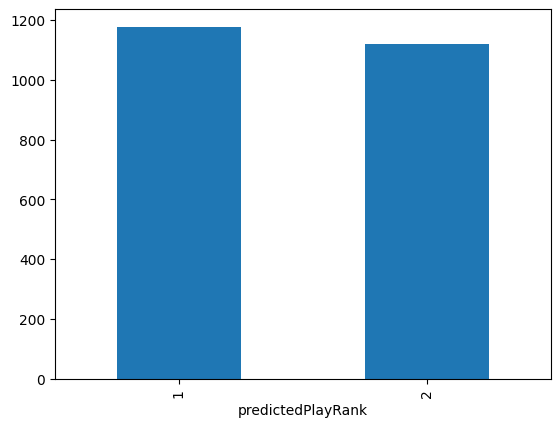

In [ ]:
predictedPlayRanks = plays_w_prob['predictedPlayRank'].value_counts()
predictedPlayRanks.plot(kind='bar')

In [ ]:
#Percent of plays where highest probability play was run
predictedPlayRanks.iloc[0] / predictedPlayRanks.sum()

0.8618502778685845

In [ ]:
#Percent of plays where highest 2 probabilities plays were run
predictedPlayRanks.iloc[0:2].sum() / predictedPlayRanks.sum()

0.9737169009480222

In [ ]:
plays = pd.read_csv('/content/drive/MyDrive/updated_plays_old.csv')
mdsample = pd.read_csv('/content/drive/MyDrive/mdsample.csv')

<ipython-input-43-8ad5a4415abc>:2: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  mdsample = pd.read_csv('/content/drive/MyDrive/mdsample.csv')


In [ ]:
plays_w_prob = plays_w_prob.merge(plays[['gameId', 'playId', 'quarter', 'down', 'yardsToGo', 'possessionTeam', 'half_seconds_remaining']], on = ['quarter', 'down', 'yardsToGo', 'possessionTeam', 'half_seconds_remaining'])

In [ ]:
mdsample_w_prob = mdsample.merge(plays_w_prob[['PASS_DEEP',	'PASS_MEDSHORT', 'RUN', 'predictedPlay', 'gameId', 'playId']], on = ['gameId', 'playId'])

In [ ]:
mdsample_w_prob.to_csv('mdsample_w_prob.csv')

In [ ]:
mdsample_w_prob.drop(['yardline'], axis=1, inplace=True)

,Unnamed: 0_x,gameId,playId,nflId,displayName,frameId,frameType,playDirection,x,y,s,a,dis,o,dir,event,teamAbbr_x,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,pff_defensiveCoverageAssignment,wasInitialPassRusher,causedPressure,week,distanceToMatchup,distanceFromBall,distfromLOS,playType,fieldSegment,playSuccessRate,offense_personnel,fg_prob,td_prob,half_seconds_remaining,vegas_wp,no_score_prob,gameYPCList,gameYPCMax,driveYards,motion,gameYPA,playDescription,gameClock,preSnapHomeScore,preSnapVisitorScore,playNullifiedByPenalty,absoluteYardlineNumber,preSnapHomeTeamWinProbability,preSnapVisitorTeamWinProbability,playClockAtSnap,passResult,passLength,targetX,targetY,playAction,dropbackType,dropbackDistance,passLocationType,timeToThrow,timeInTackleBox,timeToSack,passTippedAtLine,unblockedPressure,qbSpike,qbKneel,qbSneak,rushLocationType,penaltyYards,prePenaltyYardsGained,yardsGained,homeTeamWinProbabilityAdded,visitorTeamWinProbilityAdded,expectedPointsAdded,isDropback,pff_runConceptPrimary,pff_runConceptSecondary,pff_runPassOption,pff_passCoverage,pff_manZone,number_of_pass_rushers,defenders_in_box,opp_fg_prob,opp_td_prob,cumulativedriveyards,quarter,down,yardsToGo,possessionTeam,defensiveTeam,yardlineSide,yardlineNumber,expectedPoints,offenseFormation,receiverAlignment,Unnamed: 0_y,teamAbbr_y,inMotionAtBallSnap,shiftSinceLineset,motionSinceLineset,wasRunningRoute,routeRan,wasTargettedReceiver,hadPassReception,hadRushAttempt,PASS_DEEP,PASS_MEDIUM,PASS_SHORT,RUN_INSIDE_LEFT,RUN_INSIDE_RIGHT,RUN_OUTSIDE_LEFT,RUN_OUTSIDE_RIGHT,RUN_PASS_OPTION,RUN_UNKNOWN
0,0,2022091200,64,35459.0,Kareem Jackson,43,BEFORE_SNAP,right,51.88,29.07,0.34,0.26,0.03,261.81,303.38,line_set,DEN,NaN,NaN,NaN,NaN,False,1,13.410032,13.410032,12.389998,RUN_OUTSIDE_RIGHT,OPP GOLD ZONE,0.666667,"1 RB, 2 TE, 2 WR",0.213291,0.432702,1794.0,0.276218,0.004761,[5.0],5.0,0.0,2,7.80,(14:54) R.Penny right end to SEA 30 for no gai...,14:54,0,0,N,40,0.314417,0.685583,8.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,OUTSIDE_RIGHT,NaN,0,0,0.004575,-0.004575,-0.362858,False,OUTSIDE ZONE,LEAD;PITCH,0,Cover-3,Zone,NaN,7.0,0.135759,0.208049,0.0,1,1,10,SEA,DEN,SEA,30,1.282560,SINGLEBACK,2x2,40480,DEN,NaN,NaN,NaN,NaN,NaN,0,0,0,7.322020e-02,4.587482e-01,9.738169e-02,7.972080e-02,2.356015e-01,9.928390e-03,1.818947e-02,2.720936e-02,4.198345e-07
1,0,2022091200,64,35459.0,Kareem Jackson,43,BEFORE_SNAP,right,51.88,29.07,0.34,0.26,0.03,261.81,303.38,line_set,DEN,NaN,NaN,NaN,NaN,False,1,13.410032,13.410032,12.389998,RUN_OUTSIDE_RIGHT,OPP GOLD ZONE,0.666667,"1 RB, 2 TE, 2 WR",0.213291,0.432702,1794.0,0.276218,0.004761,[5.0],5.0,0.0,2,7.80,(14:54) R.Penny right end to SEA 30 for no gai...,14:54,0,0,N,40,0.314417,0.685583,8.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,OUTSIDE_RIGHT,NaN,0,0,0.004575,-0.004575,-0.362858,False,OUTSIDE ZONE,LEAD;PITCH,0,Cover-3,Zone,NaN,7.0,0.135759,0.208049,0.0,1,1,10,SEA,DEN,SEA,30,1.282560,SINGLEBACK,2x2,40480,DEN,NaN,NaN,NaN,NaN,NaN,0,0,0,1.026425e-01,6.825952e-03,7.202967e-01,5.233816e-02,7.935145e-02,4.580636e-03,2.259967e-02,1.136467e-02,2.312153e-07
2,1,2022091200,64,35459.0,Kareem Jackson,65,BEFORE_SNAP,right,50.70,29.39,0.68,0.36,0.07,262.63,297.92,man_in_motion,DEN,NaN,NaN,NaN,NaN,False,1,12.451525,12.451525,11.209998,RUN_OUTSIDE_RIGHT,OPP GOLD ZONE,0.666667,"1 RB, 2 TE, 2 WR",0.213291,0.432702,1794.0,0.276218,0.004761,[5.0],5.0,0.0,2,7.80,(14:54) R.Penny right end to SEA 30 for no gai...,14:54,0,0,N,40,0.314417,0.685583,8.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,OUTSIDE_RIGHT,NaN,0,0,0.004575,-0.004575,-0.362858,False,OUTSIDE ZONE,LEAD;PITCH,0,Cover-3,Zone,NaN,7.0,0.135759,0.208049,0.0,1,1,10,SEA,DEN,SEA,30,1.282560,SINGLEBACK,2x2,40480,DEN,NaN,NaN,NaN,NaN,NaN,0,0,0,7.322020e-02,4.587482e-01,9.738169e-02,7.972080e-02,2.356015e-01,9.928390e-03,1.818947e-02,2.720936e-02,4.198345e-07
3,1,2022091200,64,35459.0,Kareem Jackson,65,BEFORE_SNAP,right,50.7

#Play Vizualisation

In [ ]:
import pandas as pd
import nfl_data_py as nfl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
from celluloid import Camera

In [ ]:
plays = pd.read_csv('plays.csv')

In [ ]:
mdsample = pd.read_csv('mdsample_w_prob.csv')

<ipython-input-3-d3392b0ad0dc>:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  mdsample = pd.read_csv('mdsample_w_prob.csv')


In [ ]:
plays_w_prob = pd.read_csv('updated_plays.csv')

In [ ]:
plays_w_motion = plays_w_prob[(plays_w_prob['WR1'].notna()) & (plays_w_prob['TE1'].notna()) & (plays_w_prob['playType'] == 'PASS_DEEP')]

In [ ]:
plays_w_motion = plays_w_motion.merge(plays[['gameId',	'playId',	'playDescription']], on = ['gameId',	'playId'])

In [ ]:
plays_w_motion = plays_w_motion.merge(mdsample[['gameId',	'playId',	'predictedPlay']], on = ['gameId',	'playId'])

In [ ]:
week1tracking = pd.read_csv('tracking_week_1.csv')

In [ ]:
selected_play = week1tracking[(week1tracking['gameId'] == 2022091112) & (week1tracking['playId'] == 1613)]

In [ ]:
selected_play['x'] = selected_play['x'] - 10

In [ ]:
teams = nfl.import_team_desc()

In [ ]:
MIN_prime_color = teams.loc[teams['team_abbr'] == 'MIN', 'team_color']
GB_prime_color = teams.loc[teams['team_abbr'] == 'GB', 'team_color2']

In [ ]:
MIN_colors = [MIN_prime_color.iloc[0], '#FFFFFF']
GB_colors = ['#FFFFFF', GB_prime_color.iloc[0]]
football_color = '#453816'

In [ ]:
def draw_frame(frameId, fig, ax):
  ax.set_xlim(0, 53.3)
  ax.set_ylim(60, -10)

  plt.xticks([])
  plt.yticks([])

  sns.set(rc={'axes.facecolor':'#035212', 'axes.grid' : False})

  #Drawing field markings
  for yardline in range(-10, 60, 10):
    ax.axhline(y=yardline, color='white')
  for hashes in range(0, 60):
    ax.axhline(y=hashes, color='white', zorder=1)
  ax.axvline(x=0, color='white')
  ax.axvline(x=53, color='white')

  #Adding endzone color
  endzone = patches.Rectangle((0, -10), 53.3, 10, linewidth=0, facecolor=MIN_colors[0])
  ax.add_patch(endzone)

  #Adding patches over unneccsary hash markings
  hashpatch = patches.Rectangle((0, 0), 23.58, 60, linewidth=0, facecolor='#035212')
  ax.add_patch(hashpatch)
  hashpatch = patches.Rectangle((53.3, 0), -23.58, 60, linewidth=0, facecolor='#035212')
  ax.add_patch(hashpatch)
  hashpatch = patches.Rectangle((24.24, 0), 4.82, 60, linewidth=0,facecolor='#035212')
  ax.add_patch(hashpatch)

  #Adding yardline numbers
  ax.text(5, 2, 'G', rotation='vertical', color='white', size=15, family='serif', weight='roman')
  ax.text(48.3, 2, 'G', rotation='vertical', color='white', size=15, family='serif')
  for yardline in range (10, 60, 10):
    ax.text(5, yardline + 1, yardline, rotation='vertical', color='white', size=15, family='serif', weight='roman')
    ax.text(48.3, yardline + 1, yardline, rotation='vertical', color='white', size=15, family='serif')

  frame = selected_play[selected_play['frameId'] == frameId]
  MIN_frame = frame[frame['club'] == 'MIN']
  GB_frame = frame[frame['club'] == 'GB']
  football_frame = frame[frame['club'] == 'football']
  ax.plot()
  sns.scatterplot(MIN_frame, x='y', y='x', color=MIN_colors[0], edgecolor=MIN_colors[1], s=50, zorder=5)
  sns.scatterplot(GB_frame, x='y', y='x', color=GB_colors[1], edgecolor=GB_colors[0], s=50, zorder=5)
  sns.scatterplot(football_frame, x='y', y='x', color=football_color, s=20, zorder=5)

In [ ]:
def animate_play():
  fig, ax = plt.subplots(figsize=(5.33, 6))

  camera = Camera(fig)

  for frame in set(selected_play['frameId']):
    if(set(selected_play[selected_play['frameId'] == frame]['event']) == {'line_set'}):
      for i in range(1, 20):
        ax.text(26.65, 57, 'LINE SET', color='red', size=25, family='serif', weight='roman', ha='center', zorder=5)
        draw_frame(frame, fig, ax)
        camera.snap()
    if(set(selected_play[selected_play['frameId'] == frame]['event']) == {'ball_snap'}):
      for i in range(1, 20):
        ax.text(26.65, 57, 'SNAP', color='red', size=25, family='serif', weight='roman', ha='center', zorder=5)
        draw_frame(frame, fig, ax)
        camera.snap()
    draw_frame(frame, fig, ax)
    camera.snap()

  anim = camera.animate(blit=True)
  return anim

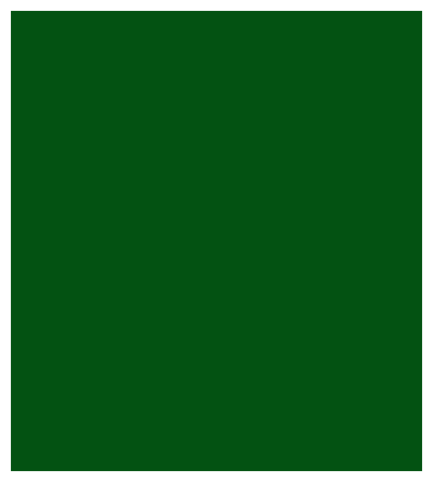

In [ ]:
anim = animate_play()

In [ ]:
anim.save(f'MIN_GB_Pass.gif', dpi=300, fps=10)

# Supplemental Data Merge with Tracking

In [ ]:
#-----------------------------------------------------------------------------------------------------------
#---------------------- Removing Excess Columns and Rows, Adding Supplementary Data ------------------------
#-----------------------------------------------------------------------------------------------------------
dropcolumns = ['time','jerseyNumber','club']
final_df.drop(columns=dropcolumns, errors='ignore', inplace=True)

final_df = final_df[final_df['event'].isin(['line_set','man_in_motion', 'ball_snap'])]
importantframes = final_df
importantframes.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/importantframes.csv")

# Add columns from player_play, plays, offensive motion, pbp dataframes
updated_plays = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/updated_plays.csv")
pbp22wks1_9 = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/pbp22wks1_9.csv")
offensivemotion = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/offensivemotion.csv")
updated_plays.drop(columns=columns_to_drop, errors='ignore', inplace=True)
#------------------------------------------------------------------------------------------------------------
def calculate_distance_from_ball(df):

    ball_data = df[df['displayName'] == 'football'][['gameId', 'playId', 'frameId', 'x', 'y']].rename(
        columns={'x': 'ball_x', 'y': 'ball_y'}
    )
    df = df.merge(ball_data, how='left', on=['gameId', 'playId', 'frameId'])
    df['distanceFromBall'] = ((df['x'] - df['ball_x'])**2 + (df['y'] - df['ball_y'])**2)**0.5
    df.drop(columns=['ball_x', 'ball_y'], inplace=True, errors='ignore')
    return df

importantframes = calculate_distance_from_ball(importantframes)

def calculate_distance_from_LOS(df):

    ball_data = df[df['displayName'] == 'football'][['gameId', 'playId', 'frameId', 'x']].rename(
        columns={'x': 'LOS_x'}
    )
    df = df.merge(ball_data, how='left', on=['gameId', 'playId', 'frameId'])
    df['distfromLOS'] = abs(df['x'] - df['LOS_x'])
    df.drop(columns=['LOS_x'], inplace=True, errors='ignore')

    return df
importantframes = calculate_distance_from_LOS(importantframes)
#-------------------------------------------------------------------------------------------------------------
# Merge All Suplemental into important_frames
import pandas as pd
important_frames = pd.merge(
    importantframes,         # The first DataFrame
    updated_plays,            # The second DataFrame to merge with
    how='left',               # Type of join; keeps all rows from important_frames
    on=['gameId', 'playId']
)
important_frames = pd.merge(
    important_frames,
    plays,
    how='left',
    on=['gameId','playId']
    )

columns_to_merge = ['gameId', 'playId', 'number_of_pass_rushers', 'defenders_in_box',
                    'opp_fg_prob', 'opp_td_prob', 'cumulativedriveyards']
# Create a copy of the selected columns to avoid the SettingWithCopyWarning
pbp_selected_columns = pbp22wks1_9[columns_to_merge].copy()

# Ensure that 'gameId' and 'playId' are of the same type in both DataFrames
pbp_selected_columns['gameId'] = pbp_selected_columns['gameId'].astype('int64')
pbp_selected_columns['playId'] = pbp_selected_columns['playId'].astype('int64')

# Now ensure the same type for important_frames
important_frames['gameId'] = important_frames['gameId'].astype('int64')
important_frames['playId'] = important_frames['playId'].astype('int64')

# Merge the DataFrames
important_frames = pd.merge(important_frames, pbp_selected_columns, on=['gameId', 'playId'], how='left')
# Print the list of column names
print(important_frames.columns.tolist())
repeated_columns = [
    "quarter", "down", "yardsToGo", "possessionTeam", "defensiveTeam",
    "yardlineSide", "yardlineNumber", "expectedPoints", "offenseFormation",
    "receiverAlignment"
]

for col in repeated_columns:
        col_x, col_y = f"{col}_x", f"{col}_y"

        # Merge columns by preferring non-null values from `_y`, otherwise fallback to `_x`
        if col_x in important_frames.columns and col_y in important_frames.columns:
            important_frames[col] = important_frames[col_y].combine_first(important_frames[col_x])
            important_frames.drop(columns=[col_x, col_y], inplace=True)  # Drop the `_x` and `_y` columns

return important_frames
#--------------------------------------------------------------------------------------------------------------
"""
important_frames = pd.merge(
    important_frames,
    offensivemotion,
    how='left',
    on=['gameId','playId']
    )
"""
important_frames.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/important_frames.csv")


#Defensive Coverage Predicition

In [ ]:
#--------------------------------------------------------------------------------------------------------------
#------------------------------------- Defensive Reaction Calculation -----------------------------------------
#--------------------------------------------------------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

# Load data
colindata = pd.read_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/mdsample_w_prob.csv")
print(colindata.columns.tolist())
unneeded = ['Unnamed: 0', 'Unnamed: 0_x','Unnamed: 0_y']
colindata.drop(columns=unneeded, errors='ignore', inplace=True)

duplicate_columns = ['teamAbbr']

def merge_duplicate_columns(colindata, duplicate_columns):
    for col in duplicate_columns:
        col_x, col_y = f"{col}_x", f"{col}_y"
        if col_x in colindata.columns and col_y in colindata.columns:
            colindata[col] = colindata[col_y].combine_first(colindata[col_x])
            colindata.drop(columns=[col_x, col_y], inplace=True)
    return colindata

colindata = merge_duplicate_columns(colindata, duplicate_columns)

# Feature selection
X = colindata[['predictedPlay', 'yardsToGo', 'quarter', 'down', 'offenseFormation', 'receiverAlignment', 'motion', 'vegas_wp',
               'inMotionAtBallSnap','shiftSinceLineset','motionSinceLineset','preSnapHomeScore','preSnapVisitorScore',
               'preSnapHomeTeamWinProbability','preSnapVisitorTeamWinProbability','absoluteYardlineNumber','gameYPCMax','fg_prob',
               'td_prob','opp_fg_prob','opp_td_prob','no_score_prob','fieldSegment','cumulativedriveyards','expectedPoints',
               'gameYPA','defenders_in_box']]

y = colindata['pff_passCoverage']

# One-hot encoding for categorical features
X = pd.get_dummies(X, columns=['predictedPlay', 'offenseFormation', 'receiverAlignment', 'motion','fieldSegment'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train.fillna(y_train.mode()[0], inplace=True)

# Imputation
imputer = SimpleImputer(strategy='most_frequent')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

# Model training
gb_clf = HistGradientBoostingClassifier()
gb_clf.fit(X_train, y_train_imputed)

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_results = cross_val_score(gb_clf, X_train, y_train_imputed, cv=cv, scoring='accuracy')
print(f"Cross-validation scores: {cross_val_results}")
print(f"Average cross-validation accuracy: {cross_val_results.mean():.2f}")

# Model evaluation
y_pred_coverage = gb_clf.predict(X_test)
print(f"Accuracy: {gb_clf.score(X_test, y_test):.2f}")
y_test = y_test.astype(str)
y_pred_coverage = y_pred_coverage.astype(str)

# Generate the classification report
classification_rep_coverage = classification_report(y_test, y_pred_coverage, output_dict=True)
classification_rep_coverage_df = pd.DataFrame(classification_rep_coverage).transpose()
print(classification_rep_coverage_df)

# Save classification report
coverage_report_path = "C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/coveragepredictionreport.csv"
classification_rep_coverage_df.to_csv(coverage_report_path, index=True)

# Predicted coverage data
colindata['ExpectedCoverage'] = gb_clf.predict(X)
predicted_coverage_df = colindata[['predictedPlay', 'pff_passCoverage', 'ExpectedCoverage']]
predicted_coverage_df.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/predicted_coverage.csv", index=False)

from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(gb_clf, X_train, y_train, n_repeats=10, random_state=42)

perm_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
})

perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

perm_importance_df.to_csv('permutation_importance.csv', index=False)

print(perm_importance_df)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = colindata[['predictedPlay', 'ExpectedCoverage']]

coverage_counts = pd.crosstab(df['predictedPlay'], df['ExpectedCoverage'])
coverage_percentages = coverage_counts.div(coverage_counts.sum(axis=1), axis=0) * 100

coverage_percentages.plot(kind='bar', stacked=False, figsize=(12, 6), cmap='tab20', width=0.9)

for p in plt.gca().patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    plt.text(x, y, f'{height:.1f}%', ha='center', va='center', fontsize=5, color='black')

plt.title('NFL Averages: Backend Coverage Tendencies by Predicted Play Type', fontsize=16)
plt.xlabel('Predicted Play Type', fontsize=12)
plt.ylabel('Percentage of Defensive Coverage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Defensive Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(pad=1.5)
plt.subplots_adjust(left=0.07, right=0.93)
plt.show()
coverage_percentages.to_csv(r'C:\Users\natha\Documents\BGA\Competitions\BigDataBowl25\coverage_tendencies_by_play_type.csv')


#Number of Rushers Prediction

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------
#--------------------------------------- Number of Rushers Prediction -----------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

X = colindata[['predictedPlay', 'yardsToGo', 'quarter', 'down', 'offenseFormation', 'receiverAlignment', 'motion', 'vegas_wp',
               'inMotionAtBallSnap','shiftSinceLineset','motionSinceLineset','preSnapHomeScore','preSnapVisitorScore',
               'preSnapHomeTeamWinProbability','preSnapVisitorTeamWinProbability','absoluteYardlineNumber','gameYPCMax','fg_prob',
               'td_prob','opp_fg_prob','opp_td_prob','no_score_prob','fieldSegment','cumulativedriveyards','expectedPoints',
               'gameYPA']]

y = colindata['number_of_pass_rushers']

X = pd.get_dummies(X, columns=['predictedPlay', 'offenseFormation', 'receiverAlignment', 'motion','fieldSegment'])

#--------
X = colinrusherdata[['predictedPlay', 'yardsToGo', 'quarter', 'down', 'offenseFormation', 'receiverAlignment', 'motion', 'vegas_wp',
                     'inMotionAtBallSnap','shiftSinceLineset','motionSinceLineset','preSnapHomeScore','preSnapVisitorScore',
                     'preSnapHomeTeamWinProbability','preSnapVisitorTeamWinProbability','absoluteYardlineNumber','gameYPCMax','fg_prob',
                     'td_prob','opp_fg_prob','opp_td_prob','no_score_prob','fieldSegment','cumulativedriveyards','expectedPoints',
                     'gameYPA','defenders_in_box']]

y = colinrusherdata['number_of_pass_rushers']

X = pd.get_dummies(X, columns=['predictedPlay', 'offenseFormation', 'receiverAlignment', 'motion','fieldSegment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gb_clf_rushers = HistGradientBoostingClassifier()
gb_clf_rushers.fit(X_train, y_train)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cross_val_results = cross_val_score(gb_clf_rushers, X_train, y_train, cv=cv, scoring='accuracy')

y_pred_rushers = gb_clf_rushers.predict(X_test)
print(f"Accuracy: {gb_clf_rushers.score(X_test, y_test):.2f}")
print(f"Average cross-validation accuracy: {cross_val_results.mean():.2f}")
classification_rep_rushers = classification_report(y_test, y_pred_rushers, output_dict=True)

classification_rep_rushers_df = pd.DataFrame(classification_rep_rushers).transpose()
print(classification_rep_rushers_df)

classification_rep_rushers_df.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/rushers_classification_report.csv")

colinrusherdata = colinrusherdata.copy()
colinrusherdata['PredictedRushers'] = gb_clf_rushers.predict(X)

predicted_rushers_df = colinrusherdata[['predictedPlay', 'number_of_pass_rushers', 'PredictedRushers']]
predicted_rushers_df.to_csv("C:/Users/natha/Documents/BGA/Competitions/BigDataBowl25/predicted_rushers.csv", index=False)


#Expected Coverage Visuals

In [ ]:
#----------------------------------------------------------------------------------------------------------------------------
#----------------------------------------- Expected Coverage Visuals --------------------------------------------------------
#----------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Create a DataFrame for plotting
plot_data = colindata[['defenders_in_box', 'ExpectedCoverage', 'pff_passCoverage', 'down', 'yardsToGo']]

# 1. Grouped Bar Chart: Expected Coverage by Number of Defenders in Box (Percentage)
plt.figure(figsize=(12, 6))

# Group and normalize by percentage
grouped_data = plot_data.groupby(['defenders_in_box', 'ExpectedCoverage']).size().unstack(fill_value=0)
grouped_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plot as a grouped bar chart
grouped_percentages.plot(kind='bar', figsize=(12, 6), stacked=False, colormap='tab20')
plt.title('Expected Coverage by Number of Defenders in Box (Percentage)')
plt.xlabel('Number of Defenders in Box')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Expected Coverage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("coverage_by_defenders_in_box_percentage.png")
plt.show()
#-----------------------------------------------------------------------------------
colindata['yardage_bucket'] = pd.cut(
    colindata['yardsToGo'],
    bins=[0, 3, 6, 9, 12, 15, float('inf')],
    labels=['1-3', '4-6', '7-9', '10-12', '13-15', '16+']
)

grouped_data = (
    colindata.groupby(['down', 'yardage_bucket', 'ExpectedCoverage'])
    .size()
    .reset_index(name='count')
)

pivot_table = grouped_data.pivot_table(
    index=['down', 'yardage_bucket'],
    columns='ExpectedCoverage',
    values='count',
    fill_value=0
)

percentages = pivot_table.div(pivot_table.sum(axis=1), axis=0)

import pandas as pd
yardage_buckets = ['1-3', '4-6', '7-9', '10-12', '13-15', '16+']

coverage_percentage_df = pd.DataFrame(columns=percentages.columns, index=pd.MultiIndex.from_product([downs, yardage_buckets], names=['Down', 'Yardage Bucket']))

fig, ax = plt.subplots(figsize=(14, 8))

x_positions = range(len(yardage_buckets))
width = 0.2

for i, down in enumerate(downs):
    bottom_values = [0] * len(yardage_buckets)
    for coverage in percentages.columns:
        values = [
            percentages.loc[(down, bucket), coverage] * 100 if (down, bucket) in percentages.index else 0
            for bucket in yardage_buckets
        ]
        bars = ax.bar(
            [x + i * width for x in x_positions],
            values,
            width,
            bottom=bottom_values,
            label=coverage if i == 0 else None,
        )
        coverage_percentage_df.loc[down, yardage_buckets] = values

        bottom_values = [sum(x) for x in zip(bottom_values, values)]

ax.set_title('Expected Coverage by Yardage Bucket and Down (Clustered Stacked)', fontsize=16)
ax.set_ylabel('Percentage (%)', fontsize=14)

ax.set_xticks([x + (width * (len(downs) - 1)) / 2 for x in x_positions])
ax.set_xticklabels([f'YardsToGo {bucket}' for bucket in yardage_buckets], fontsize=12)

for i, bucket in enumerate(yardage_buckets):
    for j, down in enumerate(downs):
        ax.text(
            x_positions[i] + j * width + width / 2,
            -5,
            f'Down {down}',
            ha='center',
            va='top',
            fontsize=10,
            rotation=45
        )

ax.legend(title='Coverage Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Coverage by Alignment


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
important_frames = pd.read_csv("C:/Users/Nicol/OneDrive/Desktop/BigDataBowl/important_frames.csv")
print(important_frames.head())

# Create a new DataFrame with the updated column
improved_important_frames = important_frames.copy()
improved_important_frames['playerRole'] = improved_important_frames.apply(
    lambda row: 'Offense' if row['teamAbbr'] == row['possessionTeam'] else 'Defense', axis=1
)

# Save the updated dataset to the environment
output_path = "C:/Users/Nicol/OneDrive/Desktop/BigDataBowl/improved_important_frames.csv"
improved_important_frames.to_csv(output_path, index=False)

# Output the new variable name to confirm
print(improved_important_frames.head())

mdsample = pd.read_csv("C:/Users/Nicol/OneDrive/Desktop/BigDataBowl/mdsample.csv")
print(mdsample.head())

# Create a new DataFrame with the updated column
improved_mdsample = mdsample.copy()
improved_mdsample['playerRole'] = improved_mdsample.apply(lambda row: 'Offense' if row['teamAbbr_x'] == row['possessionTeam'] else 'Defense', axis=1)

# Save the updated dataset to the environment
output_path = "C:/Users/Nicol/OneDrive/Desktop/BigDataBowl/improved_mdsample.csv"
improved_mdsample.to_csv(output_path, index=False)

# Output the new variable name to confirm
print(improved_mdsample.head())

In [ ]:
# Alignment Graphs NOT WORKING
import os
import matplotlib.pyplot as plt

def create_alignment_graphs(improved_important_frames, game_id, play_id, output_folder="C:/Users/Nicol/Desktop/Python/alignment_graphs"):
    print(f"Saving graph to: {output_path}")

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get unique combinations of gameId and playId
    unique_plays = improved_important_frames[['gameId', 'playId']].drop_duplicates()

    for _, row in unique_plays.iterrows():
        game_id = row['gameId']
        play_id = row['playId']

        # Filter data for the specific game and play
        play_data = improved_important_frames[
            (improved_important_frames['gameId'] == game_id) &
            (improved_important_frames['playId'] == play_id)
        ]

        if play_data.empty:
            continue  # Skip if no data for the play

        # Separate offense and defense
        offense = play_data[play_data['playerRole'] == 'Offense']
        defense = play_data[play_data['playerRole'] == 'Defense']

        # Set up the graph
        fig, ax = plt.subplots(figsize=(12, 6.5))
        ax.set_xlim(0, 120)  # Field length
        ax.set_ylim(0, 53.3)  # Field width
        ax.set_title(f"Player Alignments: Game {game_id}, Play {play_id}", fontsize=16)
        ax.set_xlabel("Field Length (yards)")
        ax.set_ylabel("Field Width (yards)")

        # Plot offense and defense
        ax.scatter(offense['x'], offense['y'], color='blue', label='Offense', alpha=0.7)
        ax.scatter(defense['x'], defense['y'], color='red', label='Defense', alpha=0.7)

        # LOS Adjustment using absoluteYardlineNumber
        if 'absoluteYardlineNumber' in play_data.columns:
            play_direction = play_data['playDirection'].iloc[0]
            los = play_data['absoluteYardlineNumber'].iloc[0]
            ax.axvline(x=los, color='green', linestyle='--', label=f'LOS ({play_direction})')

        ax.legend()

        # Save the graph
        output_path = os.path.join(output_folder, f"game_{game_id}_play_{play_id}.png")
        plt.savefig(output_path)
        plt.close(fig)  # Close the figure to free memory

    print(f"Graphs saved in folder: {output_folder}")

Modeling pff_passCoverage

In [ ]:
ffrom sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# pff_passCoverage
# Step 1: Prepare the dataset
# Filter only relevant columns for features and target
features2 = ['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'offenseFormation', 'receiverAlignment', 'down', 'yardsToGo','quarter', 'expectedPoints']
target2 = 'pff_passCoverage'

# Ensure columns exist in the dataset
data2 = improved_mdsample[features2 + [target2]].dropna()  # Drop rows with missing values

# Encode categorical variables
data2 = pd.get_dummies(data2, columns=['offenseFormation', 'receiverAlignment'])

# Split into features (X) and target (y)
X_passCoverage = data2.drop(columns=[target2])
y_passCoverage = data2[target2]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_passCoverage, y_passCoverage, test_size=0.2, random_state=42)

# Step 2: Train the model
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model2.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.847639339618575
                      precision    recall  f1-score   support

               2-Man       0.97      0.73      0.83      1886
             Bracket       0.98      0.86      0.92       702
        Cover 6-Left       0.95      0.67      0.79      6982
             Cover-0       0.99      0.88      0.93      6087
             Cover-1       0.89      0.86      0.87     33424
      Cover-1 Double       0.99      0.87      0.92       547
             Cover-2       0.90      0.76      0.82     18393
             Cover-3       0.75      0.97      0.84     51873
  Cover-3 Cloud Left       0.99      0.66      0.79       302
 Cover-3 Cloud Right       0.97      0.62      0.76       336
Cover-3 Double Cloud       1.00      0.75      0.86        92
        Cover-3 Seam       0.96      0.66      0.78      6363
       Cover-6 Right       0.97      0.65      0.78      6849
           Goal Line       0.99      0.97      0.98      1567
       Miscellaneous       1.00      0.85      0.92       125
             Prevent       0.93      0.86      0.90       453
            Quarters       0.90      0.75      0.82     20932
            Red Zone       0.97      0.98      0.98      5478

            accuracy                           0.85    162391
           macro avg       0.95      0.80      0.86    162391
        weighted avg       0.86      0.85      0.85    162391



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# pff_passCoverage WITH MOTION
# Step 1: Prepare the dataset
# Filter only relevant columns for features and target
features4 = ['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'inMotionAtBallSnap', 'offenseFormation', 'receiverAlignment', 'down', 'yardsToGo','quarter', 'expectedPoints']
target4 = 'pff_passCoverage'

# Ensure columns exist in the dataset
data4 = improved_mdsample[features4 + [target4]].dropna()  # Drop rows with missing values

# Encode categorical variables
data4 = pd.get_dummies(data4, columns=['offenseFormation', 'receiverAlignment', 'inMotionAtBallSnap'])

# Split into features (X) and target (y)
X_passCoverage4 = data4.drop(columns=[target2])
y_passCoverage4 = data4[target4]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_passCoverage4, y_passCoverage4, test_size=0.2, random_state=42)

# Step 2: Train the model
model4 = RandomForestClassifier(random_state=42)
model4.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model4.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8644630034342804
                      precision    recall  f1-score   support

               2-Man       0.97      0.79      0.87       570
             Bracket       1.00      0.88      0.94       236
        Cover 6-Left       0.95      0.71      0.82      2020
             Cover-0       0.97      0.88      0.92      1996
             Cover-1       0.89      0.87      0.88     10263
      Cover-1 Double       0.99      0.85      0.92       186
             Cover-2       0.90      0.80      0.85      6131
             Cover-3       0.78      0.97      0.86     16204
  Cover-3 Cloud Left       0.99      0.70      0.82        97
 Cover-3 Cloud Right       0.96      0.66      0.78       125
Cover-3 Double Cloud       1.00      0.74      0.85        38
        Cover-3 Seam       0.94      0.72      0.82      1967
       Cover-6 Right       0.97      0.71      0.82      2128
           Goal Line       0.99      0.92      0.95       454
       Miscellaneous       0.94      0.85      0.89        34
             Prevent       0.99      0.94      0.96       157
            Quarters       0.91      0.78      0.84      6737
            Red Zone       0.97      0.97      0.97      1905

            accuracy                           0.86     51248
           macro avg       0.95      0.82      0.88     51248
        weighted avg       0.88      0.86      0.86     51248


Modeling pff_manZone

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# pff_manZone
# Step 1: Prepare the dataset
# Filter only relevant columns for features and target
features2zone = ['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'offenseFormation', 'receiverAlignment', 'down', 'yardsToGo','quarter', 'expectedPoints']
target2zone = 'pff_manZone'

# Ensure columns exist in the dataset
data2zone = improved_mdsample[features2zone + [target2zone]].dropna()  # Drop rows with missing values

# Encode categorical variables
data2zone = pd.get_dummies(data2zone, columns=['offenseFormation', 'receiverAlignment'])

# Split into features (X) and target (y)
X_manZone = data2zone.drop(columns=[target2zone])
y_manZone = data2zone[target2zone]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_manZone, y_manZone, test_size=0.2, random_state=42)

# Step 2: Train the model
model2zone = RandomForestClassifier(random_state=42)
model2zone.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model2zone.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9243307818783061
              precision    recall  f1-score   support

         Man       0.98      0.73      0.84     41944
       Other       0.98      0.93      0.96      8325
        Zone       0.91      0.99      0.95    112122

    accuracy                           0.92    162391
   macro avg       0.96      0.89      0.91    162391
weighted avg       0.93      0.92      0.92    162391

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# pff_manZone WITH MOTION
# Step 1: Prepare the dataset
# Filter only relevant columns for features and target
features4zone = ['x', 'y', 's', 'a', 'dis', 'o', 'dir', 'inMotionAtBallSnap', 'offenseFormation', 'receiverAlignment', 'down', 'yardsToGo','quarter', 'expectedPoints']
target4zone = 'pff_manZone'

# Ensure columns exist in the dataset
data4zone = improved_mdsample[features4zone + [target2zone]].dropna()  # Drop rows with missing values

# Encode categorical variables
data4zone = pd.get_dummies(data4zone, columns=['offenseFormation', 'receiverAlignment', 'inMotionAtBallSnap', ])

# Split into features (X) and target (y)
X_manZone4 = data4zone.drop(columns=[target4zone])
y_manZone4 = data4zone[target4zone]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_manZone4, y_manZone4, test_size=0.2, random_state=42)

# Step 2: Train the model
model4zone = RandomForestClassifier(random_state=42)
model4zone.fit(X_train, y_train)

# Step 3: Evaluate the model
y_pred = model4zone.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9256946612550734
              precision    recall  f1-score   support

         Man       0.97      0.74      0.84     13015
       Other       0.98      0.93      0.96      2786
        Zone       0.91      0.99      0.95     35447

    accuracy                           0.93     51248
   macro avg       0.95      0.89      0.92     51248
weighted avg       0.93      0.93      0.92     51248


Coverage Distribution Graphs

In [ ]:
# Count occurrences of each pass coverage type for all teams
coverage_counts_pff_passCoverage = improved_mdsample.groupby('teamAbbr_x')['pff_passCoverage'].value_counts().unstack(fill_value=0)

# Plot the bar chart
coverage_counts_pff_passCoverage.plot(kind='bar', figsize=(14, 8), stacked=True, colormap="tab10")
plt.title('Pass Coverage Distribution by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title="Pass Coverage Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Count occurrences of each pass coverage type for all teams
coverage_counts_pff_manZone = improved_mdsample.groupby('teamAbbr_x')['pff_manZone'].value_counts().unstack(fill_value=0)

# Plot the bar chart
coverage_counts_pff_manZone.plot(kind='bar', figsize=(14, 8), stacked=True, colormap="tab10")
plt.title('Man/Zone Distribution by Team', fontsize=16)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title="Pass Coverage Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Change in Expected Coverage due to Man in Motion

In [ ]:
# Filter rows for line_set and ball_snap frames
line_set_frames = colindata[colindata['event'] == 'line_set']
ball_snap_frames = colindata[colindata['event'] == 'ball_snap']

# Verify data is not empty
if line_set_frames.empty or ball_snap_frames.empty:
    print("No data found for line_set or ball_snap frames. Check your data.")
else:
    # Merge line_set and ball_snap coverage data on playId
    coverage_comparison = pd.merge(
        line_set_frames[['gameId', 'playId', 'ExpectedCoverage']],
        ball_snap_frames[['gameId', 'playId', 'ExpectedCoverage']],
        on=['gameId', 'playId'],
        suffixes=('_line_set', '_ball_snap')
    )

    # Check for coverage changes
    coverage_comparison['coverage_changed'] = (
        coverage_comparison['ExpectedCoverage_line_set'] != coverage_comparison['ExpectedCoverage_ball_snap']
    )

    # Group by line_set and ball_snap coverages
    coverage_changes = coverage_comparison.groupby(
        ['ExpectedCoverage_line_set', 'ExpectedCoverage_ball_snap']
    ).size().unstack(fill_value=0)

    if coverage_changes.empty:
        print("No coverage changes detected. Verify input data and logic.")
    else:
        # Calculate percentage of changes for each line_set coverage
        coverage_percentage = coverage_changes.div(coverage_changes.sum(axis=1), axis=0) * 100

        # Plot heatmap
        import seaborn as sns
        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 8))
        sns.heatmap(
            coverage_percentage,
            annot=True,
            fmt=".1f",
            cmap="Blues",
            cbar_kws={"label": "Percentage (%)"}
        )

        plt.title("Percentage of Expected Coverage Changes Due to Motion (Line Set to Ball Snap)")
        plt.xlabel("Ball Snap Coverage")
        plt.ylabel("Line Set Coverage")
        plt.xticks(rotation=45)
        plt.tight_layout()

        plt.show()
